<a href="https://colab.research.google.com/github/niteshydv01/Edge-AI-Accelerated-Data-Science/blob/main/image_acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MST SYLLABUS,QUESTION PATTERN AND TYPES OF  QUESTION
35 MARKS...5 QUESTIONS,7 MARK EACH(2 case studies,1 cpp,1 numba,1 python nvidia course)
#SYLLABUS::
image basics,image transformations(log,gammaa),image filtering(smoothing and edge filters)

acceleration with python numba

nvidia course fundamentals of acceleration using c++


nvidia cours fundamentals of acceleration using python


#sample question
a.using python implement a acccelertaed convolution fi;lter operation which smooths tthe image if the local mean is>global mean else leaves it as is.

b.using c++ code implement matrix multiplication on gpu


c.you need to detect cars at night time,however you have images which are taken in proper lighting.how do you proceed??


In [ ]:
import numpy
from time import time

def filter2d(image, filt):
    M,N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2
    Nf2=Nf//2
    result= numpy.zeros_like(image)

    for i in range (Mf2, M-Mf2):
        for j in range (Nf, N-Nf2):
            num = 0.0
            t= image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1]
            num=numpy.sum(numpy.multiply(t,filt))
            #num=max(t) or min(t)
            # num= sort(t),take mean(sorted([a:-a])) for alpha(a)

            result[i, j]=num
    return result

from numba import double, jit

fast_filter2d = jit(double[:,:](double[:,:], double[:,:]))(filter2d)

tic=time()
image=numpy.random.random((100,100))

filt=numpy.random.random((9,9))

res= fast_filter2d(image, filt)

toc=time()
print(toc-tic)

# new_func_name= jit(return_type(par1_type, par2_type))(old_func_name)

0.0070569515228271484


In [ ]:
import numpy
from time import time

def filter2d(image, filt):
    M,N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2
    Nf2=Nf//2
    result= numpy.zeros_like(image)

    for i in range (Mf2, M-Mf2):
        for j in range (Nf, N-Nf2):
            num = 0.0

            for ii in range(Mf):
                for jj in range(Nf):
                    num+=(filt[Mf-1-ii, Nf-1-jj] * image[i-Mf2+ii, j-Nf2+jj])
           # t= image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1]
            #num=numpy.sum(numpy.multiply(t,filt))

            result[i, j]=num
    return result

from numba import double, jit

fast_filter2d = jit(double[:,:](double[:,:], double[:,:]))(filter2d)

tic=time()
image=numpy.random.random((100,100))

filt=numpy.random.random((9,9))

res= fast_filter2d(image, filt)

toc=time()
print(toc-tic)

0.012192964553833008


##NJIT

In [ ]:
from numba import jit,njit,prange
import numpy
from time import time

a=numpy.random.random((10000,1))
b=numpy.random.random((10000,1))

def call_method(a,b):
  c=numpy.zeros_like(a)
  for i in range(len(a)):
    c[i]=a[i]+b[i]
  return c

c=call_method(a,b)
tic=time()
c=call_method(a,b)
toc=time()
print(toc-tic)



@njit
def call_method_njit(a,b):
  c=numpy.zeros_like(a)
  for i in range(len(a)):
    c[i]=a[i]+b[i]
  return c

c=call_method_njit(a,b)
tic=time()
c=call_method_njit(a,b)
toc=time()
print(toc-tic)

0.02775120735168457
0.000904083251953125


#VECTORIZE

In [ ]:
from numba import jit,njit,prange
import numpy
from time import time

a=numpy.random.random((10000,1))
b=numpy.random.random((10000,1))

def call_method(a,b):
  return (a+b)


c=call_method(a,b)
tic=time()
c=call_method(a,b)
toc=time()
print(toc-tic)


@vectorize([float64(float64,float64)])

def f(x,y):


  return x+y


c=f(a,b)
tic=time()
c=f(a,b)
toc=time()
print(f.reduce(a,axis=0))
print("vectorize",toc-tic)


In [ ]:
from numba import jit, njit, vectorize, float64
import numpy as np
from time import time

# Generate random arrays
a = np.random.random((10000, 1))
b = np.random.random((10000, 1))

# Normal function for addition
def call_method(a, b):
    return a + b

# Time the normal function
c = call_method(a, b)
tic = time()
c = call_method(a, b)
toc = time()
print("Normal function:", toc - tic)

# Numba vectorized function for addition
@vectorize([float64(float64, float64)])
def f(x, y):
    return x + y

# Time the Numba vectorized function
c = f(a, b)
tic = time()
c = f(a, b)
toc = time()

print("Numba vectorized function:", toc - tic)


Normal function: 0.0001614093780517578
Numba vectorized function: 0.00011682510375976562


#GAMMA_CORR
#LOG_TRANSFORM
# IMG_ADD
#IMG_MUL

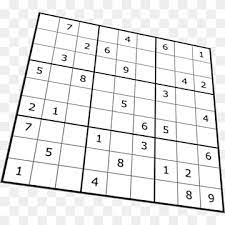

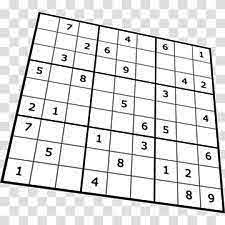

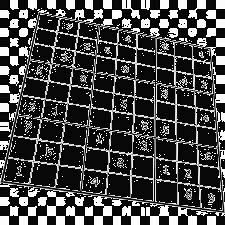

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

def gamma_corr(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def log_transform(image, c):
    # c * log(image + 1)... apply normalization to 0-255 back and forth
    table = np.array([(np.log((i / 255.0) + 1) * c) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def img_add(image, factor):
    # Apply normalization 0-255 after addition
    result = cv2.add(image, np.array([factor]))
    return np.clip(result, 0, 255)

def img_mul(image, factor):
    # Apply normalization 0-255 after multiplication
    result = cv2.multiply(image, np.array([factor]))
    return np.clip(result, 0, 255)

# Read the image
i = cv2.imread('/content/images (1).jpeg')

# Apply gamma correction
i_corr1 = gamma_corr(i, 0.5)

# Apply log transformation
i_corr2 = log_transform(i, 1.5)

# Display the original and processed images using cv2_imshow
cv2_imshow(i)
cv2_imshow(i_corr1)
cv2_imshow(i_corr2)

